# Tugas Akhir (Decision Tree, KNN, Naive Bayes, BNN)

**Nama  : Shohibun Naufal**

**NIM   : 210411100013**

**Kelas : Penambangan Data-C**

Data set Red wine quality(data set kualitas anggur merah)
adalah data set yang mengukur kualitas anggur merah berdasar kandungan zat nya.kolom kolomnya terdiri dari:



*   fixed acidity: Mengacu pada kandungan asam tartarik yang tetap dalam anggur, diukur dalam gram per liter (g/L). Asam tartarik memberikan keasaman yang diperlukan untuk menyeimbangkan rasa anggur
*   volatile acidity:Mengacu pada kandungan asam asetat dalam anggur, diukur dalam gram per liter (g/L). Konsentrasi asam asetat yang tinggi dapat memberikan rasa cuka atau asam yang tidak diinginkan pada anggur.
*   Citric acid:Mengacu pada kandungan asam sitrat dalam anggur, diukur dalam gram per liter (g/L). Asam sitrat dapat memberikan rasa segar dan keasaman yang diinginkan pada anggur.
*   residual sugar:Mengacu pada jumlah gula yang tertinggal setelah fermentasi selesai, diukur dalam gram per liter (g/L). Gula yang tertinggal dapat memberikan kelembutan atau keindahan pada anggur.
*   chlorides:Mengacu pada kandungan garam dalam anggur, diukur dalam gram per liter (g/L). Konsentrasi garam yang tinggi dapat memberikan rasa yang terlalu asin pada anggur.
*   free sulfur dioxide:Mengacu pada konsentrasi sulfur dioksida bebas dalam anggur, diukur dalam miligram per liter (mg/L). Sulfur dioksida adalah pengawet alami yang digunakan dalam anggur untuk mencegah pertumbuhan mikroba dan oksidasi.
*   total sulfur dioxide:Mengacu pada total konsentrasi sulfur dioksida dalam anggur, termasuk bentuk bebas dan terikat, diukur dalam miligram per liter (mg/L).
*   density:Mengacu pada kepadatan anggur, diukur dalam gram per centimeter kubik (g/cm3). Kepadatan dapat memberikan indikasi tentang kekentalan anggur.
*   pH:Mengacu pada tingkat keasaman atau alkalinitas dalam anggur. Skala pH berkisar antara 0 hingga 14, dengan nilai 7 dianggap netral. Anggur biasanya memiliki pH antara 3 hingga 4.
*   sulphates:Mengacu pada kandungan sulfat dalam anggur, diukur dalam gram per liter (g/L). Sulfat dapat memberikan kontribusi pada kestabilan dan perlindungan antioksidan dalam anggur.
*   alcohol:Mengacu pada tingkat kandungan alkohol dalam anggur, diukur dalam persen volume. Kandungan alkohol mempengaruhi rasa, aroma, dan kehangatan anggur.
*   quality:Mengacu pada penilaian kualitas anggur berdasarkan skala 0 hingga 10, di mana 0 merupakan kualitas terburuk dan 10 merupakan kualitas terbaik. Penilaian ini dapat bergantung pada sejumlah faktor dan subjektifitas penilai.







Mengimport library yang diperlukan

In [ ]:
import pickle
import gdown
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Mengimport data kita

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/iamwilldev/Kumpulan-Dataset/master/winequality-red.csv')

jumlah_baris = df.shape[0]
df.head(jumlah_baris)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Mengecek nilai yang hilang/kosong pada data

In [ ]:
df = df.copy()
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Mengganti nilai yang mengandung tanda tanya (?) menjadi nilai kosong

In [ ]:
df = df.replace('?',np.nan)

Mengecek lagi apakah ada nilai yang kosong pada data

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Setelah itu kita lihat type data pada fitur, jika type datanya bukan numerik maka perlu diubah type datanya

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Menghitung jumlah target pada dataset

In [ ]:
# Menghitung jumlah target
jumlah_target = df['quality'].value_counts()

# Menampilkan hasil
print(jumlah_target
)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


Melakukan Normalisasi Data

In [ ]:
# Copy Data Frame
data = df.copy()

# Mengambil kolom-kolom yang diinginkan
selected_columns = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']
selected_data = data[selected_columns]

# Kolom numerik
numeric_columns = ['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
numeric_data = selected_data[numeric_columns]

# Melakukan normalisasi Min-Max Scaling pada kolom numerik
minmax = MinMaxScaler()
normalized_numeric = minmax.fit_transform(numeric_data)


# Menggabungkan kembali data yang telah dinormalisasi
normalized_data = pd.DataFrame(
    {
        'fixed acidity': normalized_numeric[:, 0],
        'volatile acidity': normalized_numeric[:, 1],
        'citric acid': normalized_numeric[:,2],
        'residual sugar': normalized_numeric[:,3],
        'chlorides': normalized_numeric[:,4],
        'free sulfur dioxide': normalized_numeric[:,5],
        'total sulfur dioxide': normalized_numeric[:,6],
        'density': normalized_numeric[:,7],
        'ph': normalized_numeric[:,8],
        'sulphates': normalized_numeric[:,9],
        'alcohol': normalized_numeric[:,10],
        'quality': selected_data['quality'],
    }
)

normalized_data.head(jumlah_baris)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,5
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,5
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077,5
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769,6
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000,6
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923,5


Menyimpan data normalisasi

In [ ]:
with open('minmax.pkl', 'wb') as file:
    pickle.dump(minmax, file)

Membagi dataset menjadi data training dan data testing (0.8/0.2)

In [ ]:
# Memisahkan fitur dan target
X = normalized_data[['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides', 'free sulfur dioxide','total sulfur dioxide','density','ph','sulphates','alcohol']].copy()
y = normalized_data['quality'].copy()

In [ ]:
# Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

## 1. Decision Tree

Import library Decision Tree

In [ ]:
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

Membuat model Decision Tree dengan metode impurity criterion Gini

In [ ]:
# membuat klasifikasi Decision Tree dengan kedalaman maksimum 3 dan kriteria pemisahan (splitting) Gini impurity.
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=42)

# membuat model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Membuat visualisasi decision tree

[Text(0.5636114016736402, 0.9722222222222222, 'x[10] <= 0.327\ngini = 0.642\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]'),
 Text(0.36597803347280333, 0.9166666666666666, 'x[6] <= 0.327\ngini = 0.541\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]'),
 Text(0.22484309623430962, 0.8611111111111112, 'x[9] <= 0.147\ngini = 0.568\nsamples = 689\nvalue = [6, 26, 375, 251, 29, 2]'),
 Text(0.07280334728033473, 0.8055555555555556, 'x[10] <= 0.208\ngini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'),
 Text(0.03472803347280335, 0.75, 'x[8] <= 0.63\ngini = 0.389\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]'),
 Text(0.03138075313807531, 0.6944444444444444, 'x[10] <= 0.104\ngini = 0.372\nsamples = 162\nvalue = [2, 11, 126, 22, 1, 0]'),
 Text(0.013389121338912133, 0.6388888888888888, 'x[3] <= 0.079\ngini = 0.711\nsamples = 11\nvalue = [1, 3, 3, 4, 0, 0]'),
 Text(0.0066945606694560665, 0.5833333333333334, 'x[7] <= 0.437\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3, 0, 0, 0]'),
 Text

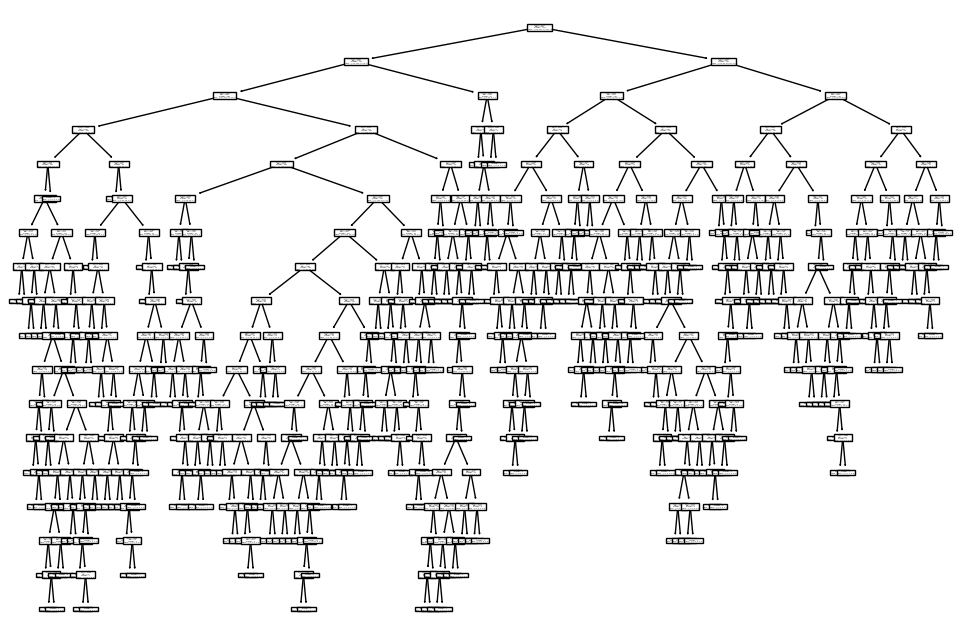

In [ ]:
# membuat figure dengan ukuran 12x8 inch (atau sekitar 30x20 cm).
plt.figure(figsize=(12,8))

# membuat visualisasi decision tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

Menampilkan visualisasi decision tree dalam bentuk grafik yang berisi informasi seperti fitur yang digunakan, nilai ambang yang digunakan dalam setiap node, dan label kelas yang dihasilkan oleh model.

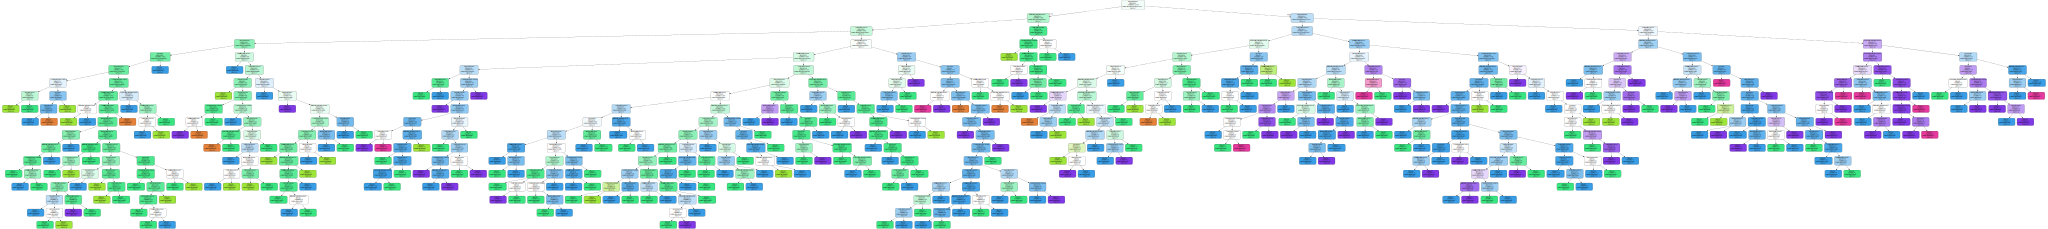

In [ ]:
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X.columns,
                              class_names=df['quality'].astype(str).unique(),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

Menghitung akurasi model Decision Tree

In [ ]:
# menghitung akurasi pada data testing
y_pred_gini = clf_gini.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_gini)
print('Accuracy Decision Tree: {:.2f}'.format(accuracy_dt))

Accuracy Decision Tree: 0.56


## 2. KNN

Import library KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Membangun model KNN
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model dengan data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred_knn = knn.predict(X_test)

# Menghitung akurasi prediksi
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print('Accuracy KNN: {:.2f}'.format(accuracy_knn))

Accuracy KNN: 0.53


## 3. Naive Bayes

Import library Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
clf_gaussian = GaussianNB()
clf_gaussian.fit(X_train, y_train)
y_pred_gaussian = clf_gaussian.predict(X_test)

# Menghitung akurasi prediksi
accuracy_nb = accuracy_score(y_test, y_pred_gaussian
                             )
print('Accuracy Naive Bayes: {:.2f}'.format(accuracy_nb))

Accuracy Naive Bayes: 0.55


## 4. Backpropagation Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp_clf = MLPClassifier(random_state=42, hidden_layer_sizes=(150,100,50),
                        max_iter = 300, activation = 'logistic',
                        solver = 'adam', alpha=0.0001)

# melakukan training pada model
mlp_clf.fit(X_train, y_train)

y_pred_mlp = mlp_clf.predict(X_test)

accuracy_bnn = accuracy_score(y_test, y_pred_mlp)
print('Accuracy BNN: {:.2f}'.format(accuracy_bnn))

Accuracy BNN: 0.41


In [ ]:
new_data = pd.DataFrame({
    'fixed acidity': [7.4],
    'volatile acidity': [0.700],
    'citric acid': [0.00],
    'residual sugar': [1.9],
    'chlorides': [0.076],
    'free sulfur dioxide' :[11.0],
    'total sulfur dioxide':[34.0],
    'density':[0.99780],
    'pH': [3.51],
    'sulphates' :[0.137725],
    'alcohol' :[9.4],
})


# Melakukan normalisasi Min-Max Scaling pada kolom numerik
normalized_new_data = minmax.transform(new_data[['fixed acidity',	'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',
                                                 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']])

# Menggabungkan kembali data yang telah dinormalisasi
normalized_data = pd.DataFrame(
    {
        'fixed acidity': normalized_numeric[:, 0],
        'volatile acidity': normalized_numeric[:, 1],
        'citric acid': normalized_numeric[:,2],
        'residual sugar': normalized_numeric[:,3],
        'chlorides': normalized_numeric[:,4],
        'free sulfur dioxide': normalized_numeric[:,5],
        'total sulfur dioxide': normalized_numeric[:,6],
        'density': normalized_numeric[:,7],
        'pH': normalized_numeric[:,8],
        'sulphates': normalized_numeric[:,9],
        'alcohol': normalized_numeric[:,10],
    }
)

# Memprediksi dari model Decision Tree
predicted_result = clf_gini.predict(normalized_new_data)



print('Predicted Result:', predicted_result)

Predicted Result: [5]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
